In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
from scipy import stats


In [2]:
train = pd.read_csv('train_E1GspfA.csv')
test = pd.read_csv('test_6QvDdzb.csv')

In [3]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [4]:
train.dtypes

date      object
hour       int64
demand     int64
dtype: object

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


### Dependent variable: demand

D:\Users\khann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='demand', ylabel='Density'>

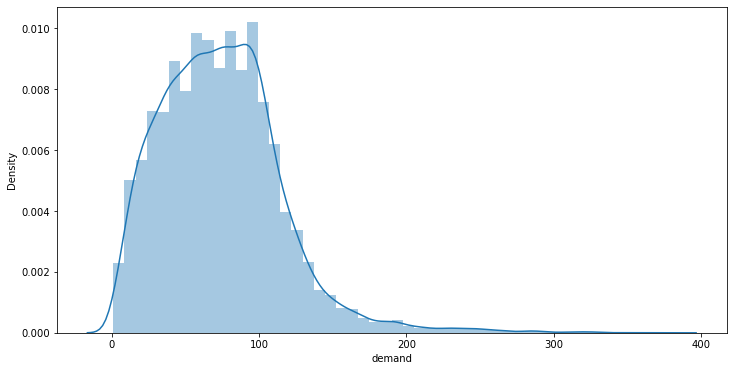

In [6]:
fig, axes = plt.subplots(figsize=(12, 6))
sn.distplot(train['demand'],ax=axes)

### Extracting independent variables from date column 

In [7]:
import calendar

In [8]:
train['year']=train.date.apply(lambda x:x.split('-')[0])
train['month'] = train.date.apply(lambda x:x.split('-')[1])
train['day'] = train.date.apply(lambda x:x.split('-')[2])
train['weekday'] = train.date.apply(lambda x:calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])


In [9]:
test['year']=test.date.apply(lambda x:x.split('-')[0])
test['month'] = test.date.apply(lambda x:x.split('-')[1])
test['day'] = test.date.apply(lambda x:x.split('-')[2])
test['weekday'] = test.date.apply(lambda x:calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])


In [10]:
test.sample(5)

,date,hour,year,month,day,weekday
1628,2021-05-14,21,2021,05,14,Friday
5494,2021-12-16,19,2021,12,16,Thursday
1122,2021-04-21,12,2021,04,21,Wednesday
4732,2021-11-11,8,2021,11,11,Thursday
2463,2021-06-22,8,2021,06,22,Tuesday


In [11]:
train.head()

,date,hour,demand,year,month,day,weekday
0,2018-08-18,9,91,2018,08,18,Saturday
1,2018-08-18,10,21,2018,08,18,Saturday
2,2018-08-18,13,23,2018,08,18,Saturday
3,2018-08-18,14,104,2018,08,18,Saturday
4,2018-08-18,15,81,2018,08,18,Saturday


In [12]:
train['year'] = pd.to_numeric(train.year,errors='coerce')
train['month'] = pd.to_numeric(train.month,errors='coerce')
train['day'] = pd.to_numeric(train.day,errors='coerce')

In [13]:
test['year'] = pd.to_numeric(test.year,errors='coerce')
test['month'] = pd.to_numeric(test.month,errors='coerce')
test['day'] = pd.to_numeric(test.day,errors='coerce')

# EDA

### Bivariate analysis

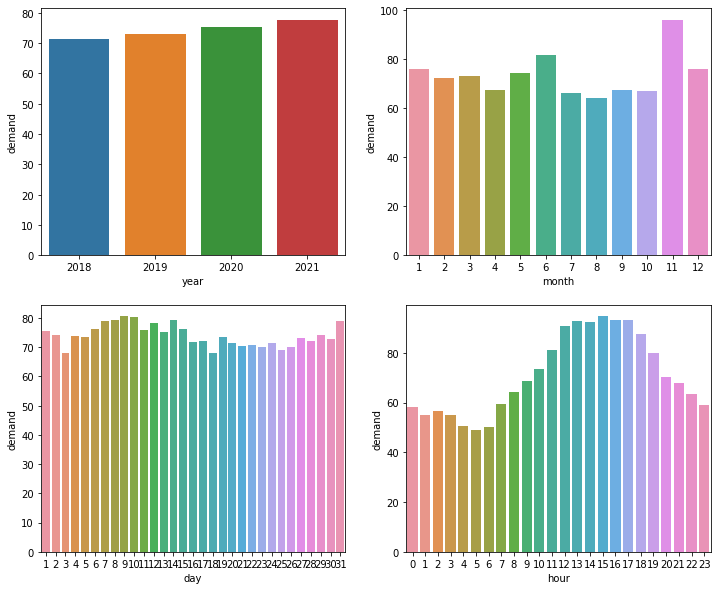

In [14]:
fig = plt.figure(figsize=[12,10])
# year demand
ax1 = fig.add_subplot(2,2,1)
ax1 = sn.barplot(x='year',y='demand',data=train.groupby('year')['demand'].mean().reset_index())

#month demand
ax2 = fig.add_subplot(2,2,2)
ax2 = sn.barplot(x='month',y='demand',data=train.groupby('month')['demand'].mean().reset_index())

#day demand
ax3 = fig.add_subplot(2,2,3)
ax3 = sn.barplot(x='day',y='demand',data=train.groupby('day')['demand'].mean().reset_index())

#hour demand
ax4 = fig.add_subplot(2,2,4)
ax4 = sn.barplot(x='hour',y='demand',data=train.groupby('hour')['demand'].mean().reset_index())

the demand of car rentals increases from year 2018 to 2021 respectively.

november month has the highrst car rental demands followed by june and january.

In hourly basis the demand of the car increases during hour 7 to 15 and then respectively decreases from the hour 15 to 22 ,
i.e the demand is high during working hour and least during 23(12 am) to 5 (5am) respectively

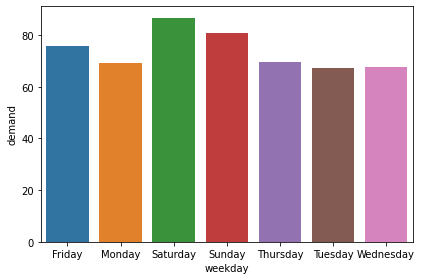

In [15]:
sn.barplot(x='weekday',y='demand',data=train.groupby('weekday')['demand'].mean().reset_index())
plt.tight_layout()

demand of car is highest on saturday and then on sunday, least on monday, tuesday and wednesday. 

for the first three days of the week te demand is less.

## Outliers 

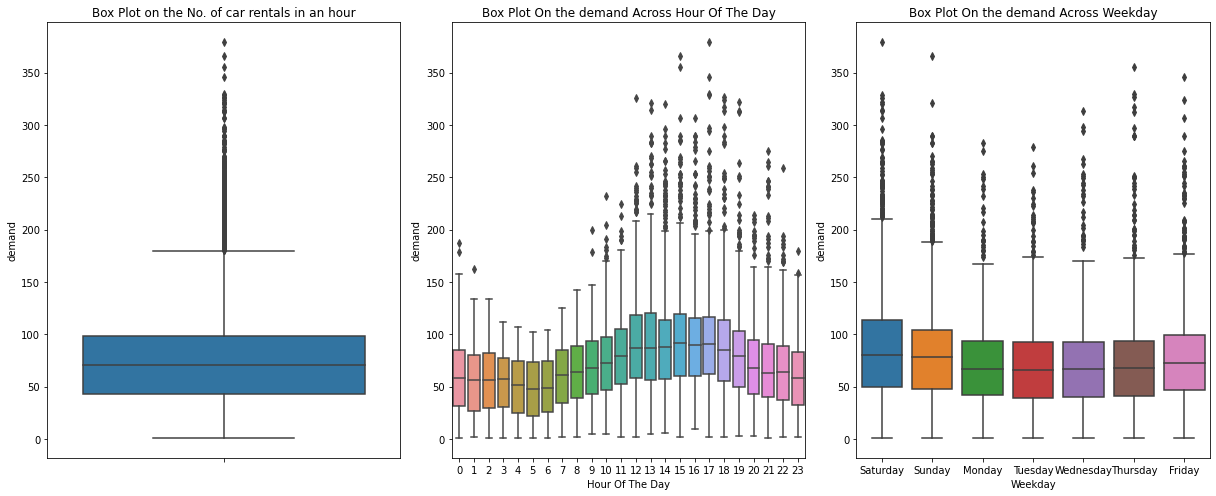

In [16]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(17, 7)
sn.boxplot(data=train,y="demand",orient="v",ax=axes[0])
sn.boxplot(data=train,y="demand",x="hour",orient="v",ax=axes[1])
sn.boxplot(data=train,y="demand",x="weekday",orient="v",ax=axes[2])

axes[0].set(ylabel='demand',title="Box Plot on the No. of car rentals in an hour")
axes[1].set(xlabel='Hour Of The Day', ylabel='demand',title="Box Plot On the demand Across Hour Of The Day")
axes[2].set(xlabel='Weekday', ylabel='demand',title="Box Plot On the demand Across Weekday")
plt.tight_layout()

In [17]:
trainWithOutOutlier = train[np.abs(train["demand"]-train["demand"].mean()) <=(3*train["demand"].std())]

In [18]:
print ("Shape with Ouliers: ",train.shape)
print ("Shape without Ouliers: ",trainWithOutOutlier.shape)

Shape with Ouliers:  (18247, 7)
Shape without Ouliers:  (18020, 7)


In [19]:
trainn=trainWithOutOutlier

<AxesSubplot:>

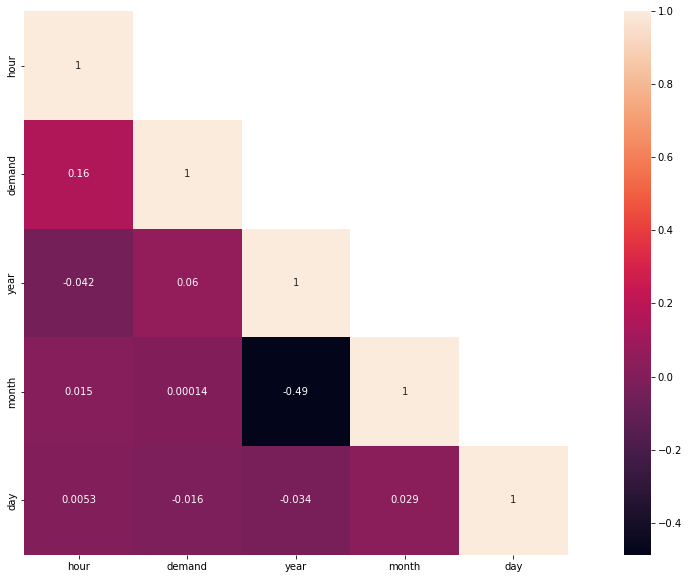

In [20]:
corrMat = trainn.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots(figsize=(20, 10))
sn.heatmap(corrMat, mask=mask,vmax=1., square=True,annot=True)

## Multivariate analysis

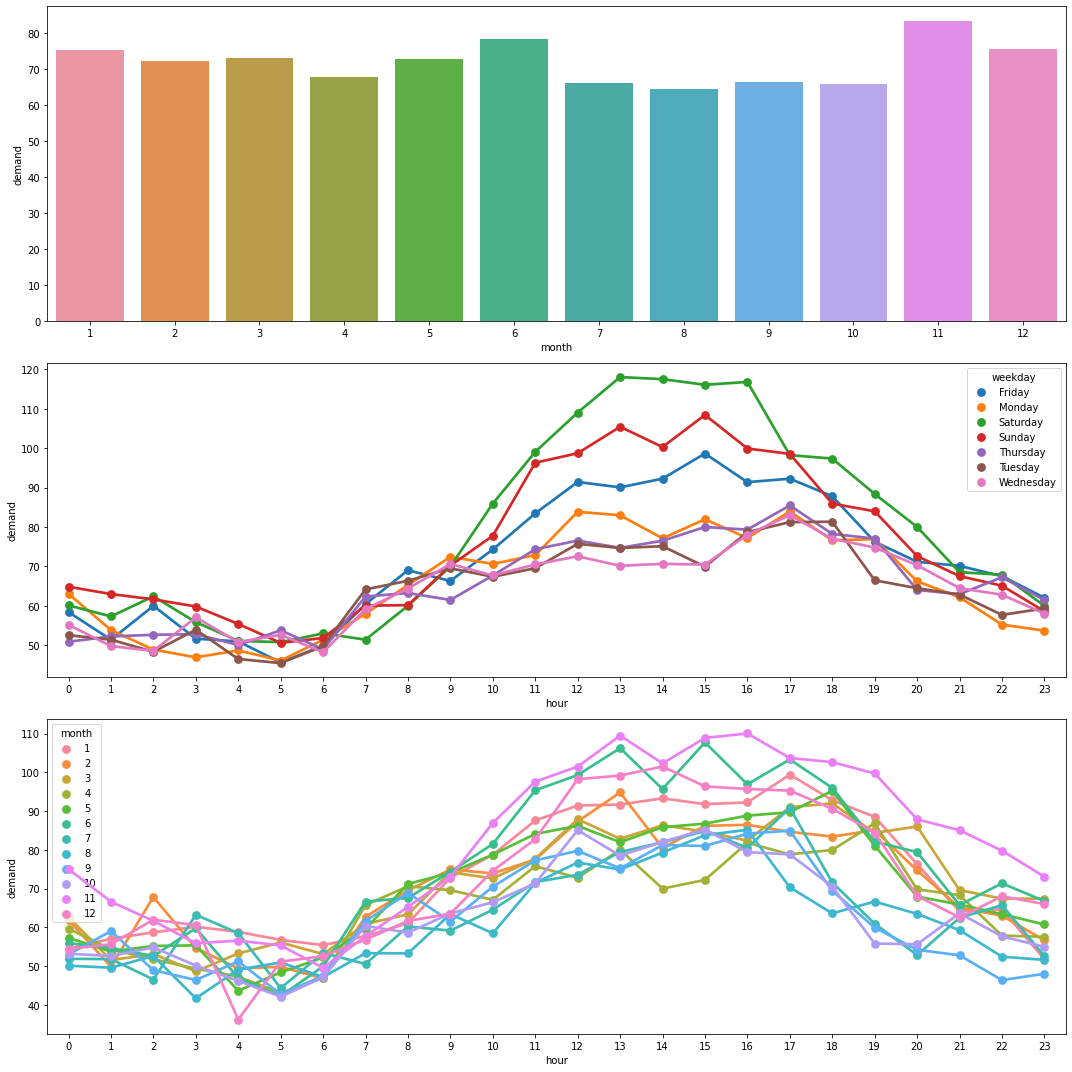

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

meanMonth = pd.DataFrame(trainn.groupby('month')['demand'].mean()).reset_index().sort_values(by='demand', ascending=False)
sn.barplot(data=meanMonth, x='month', y='demand', ax=axes[0])
axes[0].set(xlabel='month', ylabel='demand')

hoursDaily = pd.DataFrame(trainn.groupby(['hour','weekday'], sort=True)['demand'].mean()).reset_index()
sn.pointplot(x=hoursDaily['hour'], y=hoursDaily['demand'], hue=hoursDaily['weekday'], data=hoursDaily, join=True,ax=axes[1])
axes[2].set(xlabel='hour', ylabel='demand')

hoursMonthly = pd.DataFrame(trainn.groupby(['hour', 'month'], sort=True)['demand'].mean()).reset_index()
sn.pointplot(x=hoursMonthly['hour'], y=hoursMonthly['demand'], hue=hoursMonthly['month'], data=hoursMonthly, join=True, ax=axes[2])
axes[1].set(xlabel='hour', ylabel='demand')
plt.tight_layout()

In [22]:
#cars are rented mostly for Morning/Evening commutes on Weekdays, and mostly Daytime rides on Weekends
data = pd.DataFrame({'mean':train.groupby(["hour","weekday"], sort=True)["demand"].mean()}).reset_index()
data.sample(10)
#data[data['weekday']=='Monday']

,hour,weekday,mean
12,1,Tuesday,51.396825
159,22,Tuesday,57.691667
76,10,Wednesday,67.712000
66,9,Sunday,70.196721
99,14,Monday,79.629921
140,20,Friday,71.161290
54,7,Tuesday,64.154472
19,2,Tuesday,48.326923
57,8,Monday,65.281250
84,12,Friday,94.724409


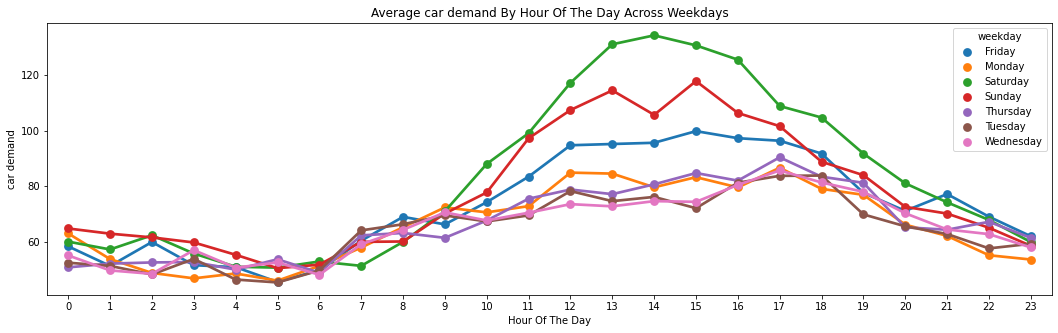

In [23]:
fig, ax = plt.subplots(figsize=(18, 5))
sn.pointplot(x=data["hour"], y=data["mean"], hue=data["weekday"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='car demand', title="Average car demand By Hour Of The Day Across Weekdays");

## Model building process

In [24]:
trainn.columns

Index(['date', 'hour', 'demand', 'year', 'month', 'day', 'weekday'], dtype='object')

In [25]:
X = trainn.drop(['date','demand' ], axis=1)

hour_df = pd.get_dummies(trainn['hour'], prefix='h', drop_first=True)
weekday_df = pd.get_dummies(trainn['weekday'], prefix='w', drop_first=True)
month_df = pd.get_dummies(trainn['month'], prefix='m', drop_first=True)
day_df = pd.get_dummies(trainn['day'], prefix='d', drop_first=True)

X = X.join(hour_df)
X = X.join(weekday_df)
X = X.join(month_df)
X = X.join(day_df)

#X = X.values
Y=trainn['demand'].values
print(X.shape)

testX = test.drop(['date'], axis=1)

hour_df = pd.get_dummies(test['hour'], prefix='h', drop_first=True)
weekday_df = pd.get_dummies(test['weekday'], prefix='w', drop_first=True)
month_df = pd.get_dummies(test['month'], prefix='m', drop_first=True)
day_df = pd.get_dummies(test['day'], prefix='d', drop_first=True)

testX = testX.join(hour_df)
testX = testX.join(weekday_df)
testX = testX.join(month_df)
testX = testX.join(day_df)

#testX = testX.values
print(testX.shape)

(18020, 75)
(7650, 75)


In [26]:
testX=testX.drop(['weekday'],axis=1)

In [27]:
test

,date,hour,year,month,day,weekday
0,2021-03-01,0,2021,3,1,Monday
1,2021-03-01,1,2021,3,1,Monday
2,2021-03-01,2,2021,3,1,Monday
3,2021-03-01,3,2021,3,1,Monday
4,2021-03-01,5,2021,3,1,Monday
...,...,...,...,...,...,...
7645,2022-03-28,19,2022,3,28,Monday
7646,2022-03-28,20,2022,3,28,Monday
7647,2022-03-28,21,2022,3,28,Monday
7648,2022-03-28,22,2022,3,28,Monday


In [28]:
X=X.drop(['weekday'],axis=1)

## Model

In [29]:
import xgboost as xgb

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

In [31]:
from sklearn.model_selection import train_test_split
xtr,xcv,ytr,ycv = train_test_split(X,Y,test_size=0.2)

### XGBRegressor

In [207]:
clf=xgb.XGBRegressor(max_depth=7,min_child_weight=6,gamma=0.4,colsample_bytree=0.5,n_estimators=20)
clf.fit(xtr,ytr)

pred = clf.predict(xcv)
#pred = np.expm1(pred)


In [208]:
mean_squared_error(ycv,pred, squared=False)

32.08611267069946

In [209]:
tspr=clf.predict(testX)

In [210]:
subm=pd.read_csv('sample_4E0BhPN.csv')

In [211]:
subm['demand']=tspr
subm['date']=test['date']
subm['hour']=test['hour']

In [212]:
pd.DataFrame(subm,columns=['date','hour','demand']).to_csv('XGB.csv',index=False)

### RandomForestRegressor

In [213]:
params = {'n_estimators': 500, 'max_depth': 20, 'random_state': 0, 'min_samples_split' : 5, 'n_jobs': -1}
rf_model = RandomForestRegressor(**params)

In [214]:
rf_model.fit(xtr,ytr)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=500,
                      n_jobs=-1, random_state=0)

In [215]:
pr=rf_model.predict(xcv)
mean_squared_error(ycv,pr, squared=False)

31.702676666925285

In [216]:
prd=rf_model.predict(testX)

In [217]:
subm['demand']=prd
subm['date']=test['date']
subm['hour']=test['hour']

In [218]:
pd.DataFrame(subm,columns=['date','hour','demand']).to_csv('RFR.csv',index=False)

### GradientBoostingRegressor

In [219]:
params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**params)

In [220]:
gbm_model.fit(xtr,ytr)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=10, n_estimators=150,
                          random_state=0, subsample=0.7)

In [227]:
pr=gbm_model.predict(xcv)
mean_squared_error(ycv,pr, squared=False)

31.731991345586792

In [228]:
prd=gbm_model.predict(testX)

In [229]:
subm['demand']=prd
subm['date']=subm['date']
subm['hour']=subm['hour']

In [230]:
pd.DataFrame(subm,columns=['date','hour','demand']).to_csv('GBM.csv',index=False)